In [3]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/취업정보/news.csv의 사본")

In [4]:
df = df.dropna()

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df

,date,media,title,content,ngrams
0,2005-01-01,연합인포맥스,내년 美국채수익률 5% 넘어서기 어려울 듯,2005년 10년만기 미국 국채수익률이 연방준비제도이사회(FRB)의 금리인상 지속...,"만기/NNG,국채/NNG,수익률/NNG,fed/NNG,fed/NNG,금리/NNG,인..."
1,2005-01-01,연합인포맥스,[뉴욕채권-마감] 10년만기 국채수익률 작년보다 낮은 수준서 마쳐,2년만기 국채가격 4년래 최악의 한해 보내 10년만기 미국 국채수익률이 ...,"만기/NNG,국채/NNG,가격/NNG,최악/NNG,보내/VV,만기/NNG,국채/NN..."
2,2005-01-01,연합인포맥스,[뉴욕환시] `내년초 달러-엔에 주력'..달러 對엔 하락,2004년 마지막 거래일인 31일 뉴욕환시에서 미국 달러화는 개장초 102엔 근처...,"마지막/NNG,거래일/NNG,뉴욕/NNG,환시/NNG,달러/NNG,개장/NNG,근처..."
3,2005-01-01,연합인포맥스,[31일 뉴욕금융시장 요약] 한산한 거래속 새해 준비,) 한해 마지막 날인 31일 뉴욕 주요 금융시장은 한산한 거래속에 새해를 준비하는 ...,"마지막/NNG,뉴욕/NNG,금융시장/NNG,한산/NNG,거래/NNG,새해/NNG,준..."
4,2005-01-02,연합인포맥스,美 증시 기술주 주도로 2년 연속 상승..'01년래 최고,지난해 뉴욕증시는 기술주 주도로 2년 연속연초 대비 상승하면서 대표지수들을 지난 ...,"주도/NNG,연속/NNG,대비/NNG,상승/NNG,대표지수/NNG,최고/NNG,오르..."
...,...,...,...,...,...
261812,2019-12-31,이데일리,'안심대출 여파' 예금은행 대출금리 3.18%…1996년 편제 이후 최저,한국은행 11월중 금융기관 가중평균금리주택담보대출도 0.05%p 내린 2.45%로 ...,"금융기관/NNG,금리/NNG,주택담보대출/NNG,내리/VV,역대/NNG,최저/NNG..."
261813,2019-12-31,이데일리,이주열 “양적 확대로 성장동력 창출 어려워…혁신성장해야”,이주열 한국은행 총재 신년사(사진=연합뉴스)[이데일리 김경은 기자] 이주열(사진) ...,"신년사/NNG,가장/MAG,주력/NNG,과제/NNG,혁신성장/NNG,동력/NNG,확..."
261814,2019-12-31,이데일리,"""내년 세계경제 우상향…유가·금리 환경 든든""",KB증권 보고서[이데일리 전재욱 기자] KB증권은 내년 세계 경제가 미·중 무역분쟁...,"보고서/NNG,세계/NNG,경제/NNG,무역/NNG,분쟁/NNG,소강/NNG,통화정..."
261815,2019-12-31,이데일리,"금융권 쥐띠 리더들…""어려운 환경에도 새로운 기회 만들것""",은행권서 농협 이대훈·수협 이동빈 행장 대표적카드 '빅3' CEO 모두 쥐띠..삼성...,"농협/NNG,수협/NNG,이동/NNG,행장/NNG,카드/NNG,쥐띠/NNG,금융/N..."


In [7]:
df['tokens'] = df['ngrams'].apply(lambda x : ' '.join([w.split('/')[0] for w in x.split(",")]))
token_list = df['tokens'].tolist() #문장의 리스트

In [8]:
len(token_list)

261802

In [9]:
token_list[:2]

['만기 국채 수익률 fed fed 금리 인상 지속 따르 인플레이션 압력 완화 어렵 전망 인플레이션 제어 반면 만기 국채 수익률 fed 지속 금리 인상 수준 상승 예측 단기 국채 수익률 상승 나타나 반면 장기 국채 수익률 상승 제한 일드커브 플래트닝 가속 덧붙이 고용창출 호조 수입 증가 견인 고용시장 호전 소비자 지출 떠받치 단기 국채 일드커브 인플레이션 fed 고용창출 고용시장 수입 완화',
 '만기 국채 가격 최악 보내 만기 국채 수익률 수준 거래 마감 뉴욕 fed fed 금리 인상 했으나 인플레이션 제어 예상 만기 국채 수익률 소폭 수준 만기 국채 가격 fed 금리 인상 지속 최악 보내 덧붙이 fed 점진적 금리 인상 단행 fed 금리 인상 고용시장 동향 예의 주시 반면 고용창출 건수 호전 fed 공격적 금리 인상 정책 지속 가능성 강조 만기 국채 가격 포인트 오르 가격 움직이 수익률 떨어 만기 국채 수익률 기록 했었 만기 국채 가격 수익률 국채 인상']

In [10]:
#w2v에 학습시키기 위해 넣는 것은 list의 list
total_token_ls = [tokens.split() for tokens in token_list]
total_token_ls[0]

['만기',
 '국채',
 '수익률',
 'fed',
 'fed',
 '금리',
 '인상',
 '지속',
 '따르',
 '인플레이션',
 '압력',
 '완화',
 '어렵',
 '전망',
 '인플레이션',
 '제어',
 '반면',
 '만기',
 '국채',
 '수익률',
 'fed',
 '지속',
 '금리',
 '인상',
 '수준',
 '상승',
 '예측',
 '단기',
 '국채',
 '수익률',
 '상승',
 '나타나',
 '반면',
 '장기',
 '국채',
 '수익률',
 '상승',
 '제한',
 '일드커브',
 '플래트닝',
 '가속',
 '덧붙이',
 '고용창출',
 '호조',
 '수입',
 '증가',
 '견인',
 '고용시장',
 '호전',
 '소비자',
 '지출',
 '떠받치',
 '단기',
 '국채',
 '일드커브',
 '인플레이션',
 'fed',
 '고용창출',
 '고용시장',
 '수입',
 '완화']

Glove

In [11]:
del df

In [12]:
del token_list

In [13]:
!pip install glove-python-binary

In [14]:
from glove import Corpus, Glove

corpus = Corpus()
#말뭉치에서 동시 등장 행렬, 사전 만들기
corpus.fit(total_token_ls[:1000], window=5) #잘 돌아가는지 확인 위해 1000개만

glove = Glove(no_components=100, learning_rate=0.05) #no_components: word dimension
#corpus.matrix: 동시등장 행렬
glove.fit(corpus.matrix, epochs=20, no_threads=4, verbose=True)
glove.add_dictionary(corpus.dictionary)

Performing 20 training epochs with 4 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19


In [15]:
# "금리"와 유사한 단어
glove.most_similar("금리")

[('장단기', 0.9396403020864559),
 ('동결', 0.9122869186695416),
 ('장기', 0.9039623888251976),
 ('변동', 0.8921363104052689)]

In [16]:
glove.most_similar("인플레이션")

[('억제', 0.8938104576666999),
 ('제어', 0.8683914618936376),
 ('강화', 0.8436606510813963),
 ('통제', 0.7936791955894501)]

FastText

In [ ]:
from gensim.models import FastText
model = FastText(total_token_ls[:1000], size=100, window=5, min_count=2, sg=1, iter=100, min_n=3, max_n=6)

In [ ]:
model.wv.most_similar("금리")

In [ ]:
model.wv.most_similar("인플레이션")

CNN

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [11]:
image = tf.constant([[[[1], [2], [3]], [[4], [5], [6]], [[7], [8], [9]]]], dtype=np.float32)

In [12]:
image.shape

TensorShape([1, 3, 3, 1])

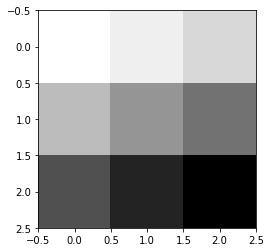

In [13]:
plt.imshow(image.numpy().reshape(3,3), cmap='Greys')
plt.show()

In [14]:
# 필터 만들기
weight = np.array([[[[1.]], [[1.]]], [[[1.]], [[1.]]]])
weight.shape
# (2, 2, channel, keras-filter 개수)

(2, 2, 1, 1)

In [15]:
# 가중치 초기값
# padding= 'valid' -> 패딩 적용하지 않음
weight_init = tf.constant_initializer(weight)
conv2d = tf.keras.layers.Conv2D(filters=1, kernel_size=2, padding='valid', kernel_initializer=weight_init)(image) #Conv2D: 합성곱 연산
conv2d.shape

TensorShape([1, 2, 2, 1])

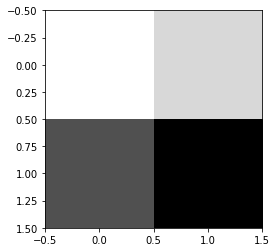

In [17]:
#filter 적용한 output
plt.imshow(conv2d.numpy().reshape(2, 2), cmap='Greys')
plt.show()

In [18]:
# padding= 'same' -> 입력값과 출력값의 size를 같게 함 -> (3,3)
weight_init = tf.constant_initializer(weight)
conv2d = tf.keras.layers.Conv2D(filters=1, kernel_size=2, padding='same', kernel_initializer=weight_init)(image) #Conv2D: 합성곱 연산
conv2d.shape

TensorShape([1, 3, 3, 1])

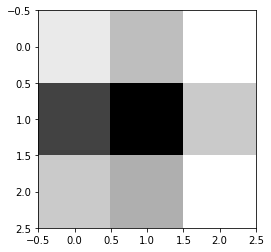

In [19]:
plt.imshow(conv2d.numpy().reshape(3, 3), cmap='Greys')
plt.show()
#앞서는 차례대로 그라데이션, but filter 적용했더니 그림 다르게 나옴

In [20]:
# 필터 만들기2 - 필터 3개
weight = np.array([[[[1., 10, -1]], [[1., 10, -1]]], [[[1., 10, -1]], [[1., 10, -1]]]])
weight.shape #height, weight, sample 개수, filter 개수

(2, 2, 1, 3)

In [21]:
weight_init = tf.constant_initializer(weight)
conv2d = tf.keras.layers.Conv2D(filters=3, kernel_size=2, padding='same', kernel_initializer=weight_init)(image) #Conv2D: 합성곱 연산
conv2d.shape

TensorShape([1, 3, 3, 3])

feature_maps shape :  (3, 3, 3, 1)


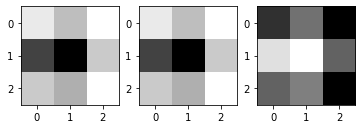

In [22]:
feature_maps = np.swapaxes(conv2d, 0, 3) #맨마지막 필터개수 3이 맨앞으로 감 -> 필터별 이미지 만드는 for문 쓰기 위함
print("feature_maps shape : ", feature_maps.shape)

for i, feature_map in enumerate(feature_maps):
  plt.subplot(1,3, i+1)
  plt.imshow(feature_map.reshape(3,3), cmap='Greys')
plt.show()

In [23]:
image = tf.constant([[[[4], [3]], [[2], [1]]]], dtype=np.float32)
image.shape

TensorShape([1, 2, 2, 1])

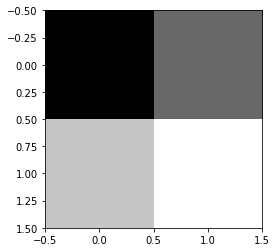

In [25]:
plt.imshow(image.numpy().reshape(2, 2), cmap='Greys')
plt.show()

In [28]:
# max_pooling 적용
pool = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=1, padding='valid')(image)
print(pool.shape)
print(pool.numpy()) #제일 큰 값 4 출력

(1, 1, 1, 1)
[[[[4.]]]]


CNN_MNIST

In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [30]:
train_images.shape #sample 6만개

(60000, 28, 28)

In [31]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [32]:
# 0~1 사이 값으로 정규화
train_images = train_images/255
test_images = test_images/255

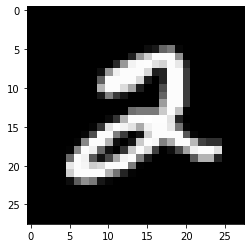

In [33]:
img = train_images[5]
plt.imshow(img, cmap='gray')
plt.show()

In [34]:
#위에서 한것처럼 4차원으로 만들어줘야 함
img = img.reshape(-1, 28, 28, 1) #3차원이니까 차원 하나 추가해줌
img = tf.convert_to_tensor(img) #numpy array가 tensor로 바뀜

In [38]:
weight_init = tf.keras.initializers.RandomNormal(stddev=0.01)
conv2d = tf.keras.layers.Conv2D(filters=5, kernel_size=(3, 3), strides=(2, 2), padding='same', kernel_initializer=weight_init)(img)
#이미지 결정=>입력 결정, kernel size 결정=>filter 만들기
#내가 어떤 weight를 (3,3) size로 할 건데 그 초기값을 randomnormal로 주겠다

In [39]:
conv2d.shape #strides를 (2,2)로 뒀기 때문에 28에서 14로 & filter는 5개

TensorShape([1, 14, 14, 5])

In [40]:
def display(conv2d, n, w, h):
  feature_maps = np.swapaxes(conv2d, 0, 3) #filter의 개수 5와 샘플 개수 1을 바꿈
  for i, feature_map in enumerate(feature_maps): #필터에 대해 이미지 하나씩 가져오기 위함!
    plt.subplot(1, n, i + 1)
    plt.imshow(feature_map.reshape(w, h), cmap='Greys')
  plt.show()

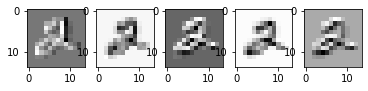

In [41]:
display(conv2d, 5, 14, 14) #(conv2d, 필터개수, width, height)
#필터에 따라 이미지에 대한 특징 다르게 추출

In [42]:
# max pooling
pool = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2,2), padding='same')(conv2d)
pool.shape
#padding은 기존의 w,h 가져옴 -> (14, 14)
#기존 w,h에 pool하면 2로 나눠줘야 함 -> (7, 7)

TensorShape([1, 7, 7, 5])

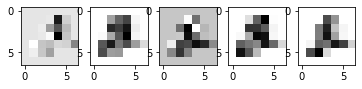

In [43]:
display(pool, 5, 7, 7) #pool 안했을 때보다 이미지의 특징이 더 두드러짐

In [2]:
# 이미지 나누기
from sklearn.model_selection import train_test_split

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))

train_images = train_images / 255. #소수점으로 나누기 위함
test_images = test_images / 255.

#전체 train의 75% 정도 가져와서 overfitting 일어나는지 확인 & test는 최종 검사용
valid_images, test_images, valid_labels, test_labels = train_test_split(test_images, test_labels, test_size=0.15, shuffle=True)

In [46]:
print("train_images.shape : ", train_images.shape)
print("valid_images.shape : ", valid_images.shape)
print("test_images.shape : ", test_images.shape)

train_images.shape :  (60000, 28, 28, 1)
valid_images.shape :  (8500, 28, 28, 1)
test_images.shape :  (1500, 28, 28, 1)


Keras: Sequential model

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential()
#차례대로 add - conv와 relu 반복(CNN p.33)
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) #channel: 1
model.add(MaxPool2D((2, 2))) #(2,2)는 차원의 괄호이므로 밖에 괄호 하나 더 써줘야 함
model.add(Conv2D(64, (3, 3), activation='relu')) #filter 개수 늘려줌, input 필요x
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(Flatten()) #2D를 1차원으로(일렬로) 펼침
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax')) #output이므로 softmax

model.summary()
#param: 학습하는 파라미터의 개수
#max_pooling: down sampling이므로 학습하는 것 없음
#flatten: 배열 한줄로 풀어줌 - 학습할 파라미터 없음

#w파라미터 개수는 필터와 관련
# 1. 32 * (3*3) + bias = 288 + 32 = 320
# 2. 32 * 64 * (3*3) + 64 = 18496
# 3. 64 * 9 * 2 + 64 = 36928
# output: 64*10 + 10 = 650

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

Keras: Functional API

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

inputs = Input(shape=(28, 28, 1))
conv1 = Conv2D(32, (3, 3), activation=tf.nn.relu)(inputs)
pool1 = MaxPool2D((2, 2))(conv1)

conv2 = Conv2D(64, (3, 3), activation=tf.nn.relu)(pool1)
pool2 = MaxPool2D((2, 2))(conv2)

conv3 = Conv2D(64, (3, 3), activation=tf.nn.relu)(pool2)
flat = Flatten()(conv3)

dense4 = Dense(64, activation='relu')(flat)
outputs = Dense(10, activation='softmax')(dense4)

model = Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928 

In [5]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) #loss함수, optimizer
hist = model.fit(train_images, train_labels,
                 validation_data=(valid_images, valid_labels),
                 epochs=100, batch_size=200) #epoch 한번 돈 다음에 내부적으로 validation data로 과적합 여부 확인함
                 #batch_size=200이므로 한 배치당 300개씩 돌아가고 있음

Epoch 1/100
300/300 [==============================] - 14s 15ms/step - loss: 0.3042 - accuracy: 0.9130 - val_loss: 0.0773 - val_accuracy: 0.9768
Epoch 2/100
300/300 [==============================] - 4s 13ms/step - loss: 0.0689 - accuracy: 0.9790 - val_loss: 0.0456 - val_accuracy: 0.9847
Epoch 3/100
300/300 [==============================] - 4s 13ms/step - loss: 0.0494 - accuracy: 0.9846 - val_loss: 0.0414 - val_accuracy: 0.9860
Epoch 4/100
300/300 [==============================] - 4s 14ms/step - loss: 0.0389 - accuracy: 0.9877 - val_loss: 0.0359 - val_accuracy: 0.9886
Epoch 5/100
300/300 [==============================] - 4s 13ms/step - loss: 0.0325 - accuracy: 0.9899 - val_loss: 0.0321 - val_accuracy: 0.9894
Epoch 6/100
300/300 [==============================] - 4s 14ms/step - loss: 0.0268 - accuracy: 0.9918 - val_loss: 0.0281 - val_accuracy: 0.9913
Epoch 7/100
300/300 [==============================] - 4s 13ms/step - loss: 0.0234 - accuracy: 0.9925 - val_loss: 0.0298 - val_accuracy

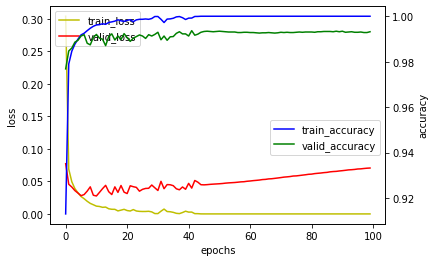

In [8]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train_loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='valid_loss')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(hist.history['accuracy'], 'b', label='train_accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='valid_accuracy')
acc_ax.set_xlabel('epochs')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper right', bbox_to_anchor=(1, 0.5))

plt.show()
# 0~10 epochs쯤에 과적합 일어나서 loss 급감, accuracy는 급증